In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
df = pd.read_csv('../data/stop_and_search_cleaned.csv')

# display(df.head(2))

## Format Date Column

In [10]:
df['Date'] = df['Date'].str.slice(0, 16)

df['Date'] = pd.to_datetime(df['Date'], format = "%Y-%m-%d %H:%M")
df.set_index('Date', inplace=True)

display(df)

,Type,Latitude,Longitude,Gender,Age range,Officer-defined ethnicity,Legislation,Object of search,Outcome,Outcome linked to object of search,Removal of more than just outer clothing,Police_Dept,Self_defined_ethnicity
Date,,,,,,,,,,,,,
2014-09-30 23:35:00,Person search,51.718631,-3.059401,NaN,25-34,Other,Police and Criminal Evidence Act 1984 (section 1),Stolen goods,Nothing found - no further action,NaN,NaN,gwent,White/British
2014-09-30 23:50:00,Person search,51.583966,-2.994404,Male,over 34,Other,Misuse of Drugs Act 1971 (section 23),Controlled drugs,Nothing found - no further action,NaN,NaN,gwent,Not Stated
2014-10-01 00:20:00,Person search,51.731833,-3.066993,Male,over 34,White,Police and Criminal Evidence Act 1984 (section 1),Controlled drugs,Nothing found - no further action,NaN,NaN,gwent,White/British
2014-10-01 01:15:00,Person search,51.824979,-3.018959,Male,over 34,White,Police and Criminal Evidence Act 1984 (section 1),Stolen goods,Nothing found - no further action,NaN,NaN,gwent,White/British
2014-10-01 08:20:00,Person search,51.591295,-2.987910,Male,25-34,White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,NaN,NaN,NaN,gwent,White/British
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-11-30 21:26:00,Person search,52.376361,-1.747030,Male,10-17,White,Police and Criminal Evidence Act 1984 (section 1),Offensive weapons,A no further action disposal,NaN,False,west_midlands,White/British
2024-11-30 21:40:00,Person search,52.371651,-1.752065,Male,10-17,White,Police and Criminal Evidence Act 1984 (section 1),Offensive weapons,A no further action disposal,NaN,False,west_midlands,White/British
2024-11-30 21:56:00,Person search,52.371651,-1.752065,Male,10-17,White,Police and Criminal Evidence Act 1984 (section 1),Offensive weapons,A no further action disposal,NaN,False,west_midlands,White/British


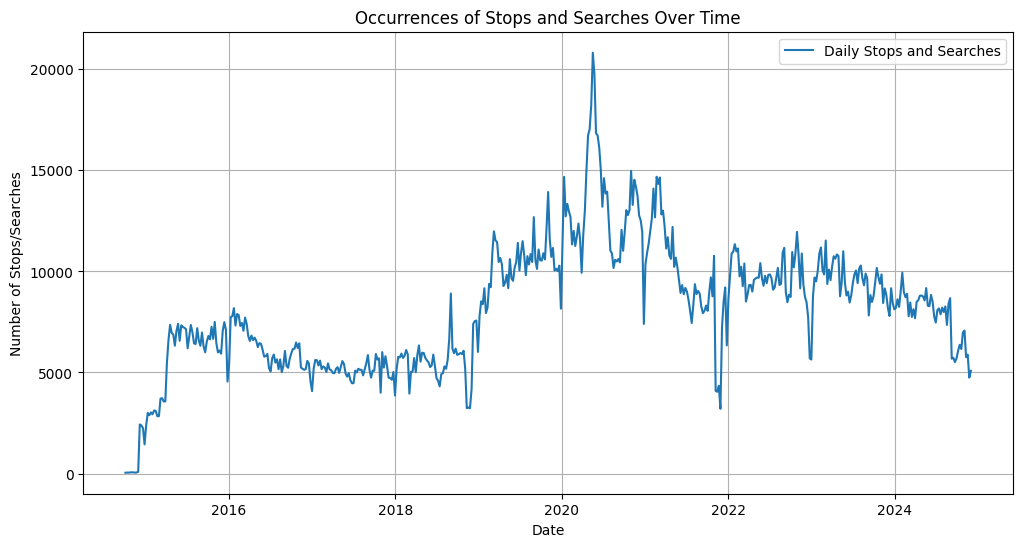

In [17]:
# adjust 'D' to 'W' for weekly or 'M' for monthly
daily_counts = df.resample('W').size()

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(daily_counts, label="Daily Stops and Searches")
plt.title("Occurrences of Stops and Searches Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Stops/Searches")
plt.legend()
plt.grid(True)

plt.show()

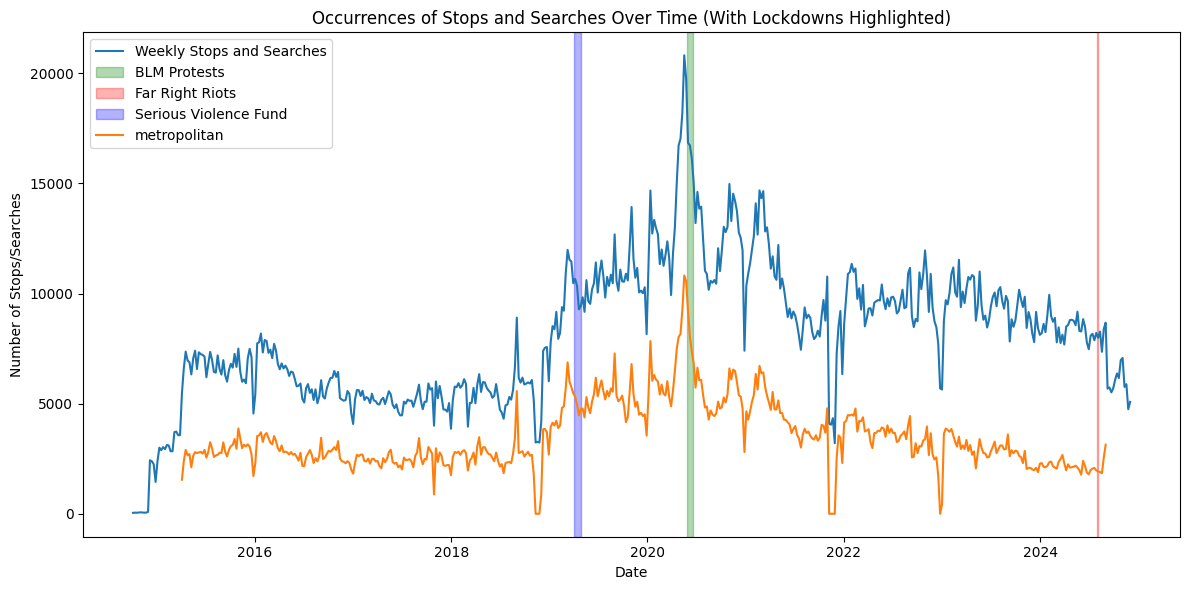

In [24]:

# Resample data to weekly counts
daily_counts = df.resample('W').size()

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(daily_counts, label="Weekly Stops and Searches")

# Highlight lockdown periods
plt.axvspan(pd.to_datetime('2020-05-28'), pd.to_datetime('2020-06-20'), alpha=0.3, label="BLM Protests", color='green')
plt.axvspan(pd.to_datetime('2024-07-30'), pd.to_datetime('2024-08-5'), alpha=0.3, label="Far Right Riots", color='red')
plt.axvspan(pd.to_datetime('2019-04-01'), pd.to_datetime('2019-04-30'), alpha=0.3, label="Serious Violence Fund", color='blue')


plt.plot(df[df['Police_Dept'] == 'metropolitan'].resample('W').size(), label="metropolitan")

# Add labels, title, and legend
plt.title("Occurrences of Stops and Searches Over Time (With Lockdowns Highlighted)")
plt.xlabel("Date")
plt.ylabel("Number of Stops/Searches")
plt.legend(loc='upper left')
# plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

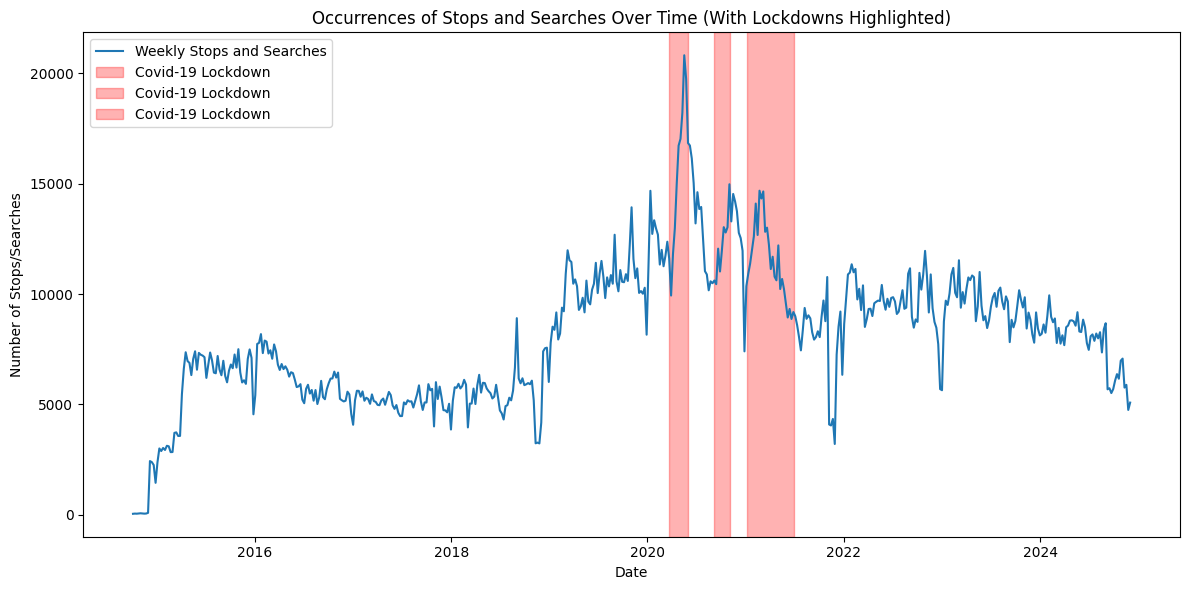

In [18]:

# Assume lockdown periods in the UK (adjust dates as necessary)
lockdown_periods = [
    ('2020-03-23', '2020-06-01'),  # First lockdown
    ('2020-09-05', '2020-11-02'),  # Second lockdown
    ('2021-01-06', '2021-07-01')   # Third lockdown
]

# Resample data to weekly counts
daily_counts = df.resample('W').size()

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(daily_counts, label="Weekly Stops and Searches")

# Highlight lockdown periods
for start, end in lockdown_periods:
    plt.axvspan(pd.to_datetime(start), pd.to_datetime(end), alpha=0.3, label="Covid-19 Lockdown", color='red')

# Add labels, title, and legend
plt.title("Occurrences of Stops and Searches Over Time (With Lockdowns Highlighted)")
plt.xlabel("Date")
plt.ylabel("Number of Stops/Searches")
plt.legend(loc='upper left')
# plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

In [138]:
df['Police_Dept'].value_counts()

Police_Dept
metropolitan          1716344
merseyside             316790
west_midlands          201730
west_yorkshire         149289
thames_valley          128708
essex                  119556
hampshire              102484
kent                   100183
south_yorkshire         95453
lancashire              92278
btp                     84951
south_wales             81299
hertfordshire           68969
sussex                  61603
avon_and_somerset       61094
surrey                  59055
northumbria             54219
devon_and_cornwall      49161
west_mercia             48983
staffordshire           47087
cheshire                44683
cleveland               41694
dyfed_powys             37632
leicestershire          35975
nottinghamshire         35389
norfolk                 34588
cumbria                 34148
humberside              33409
north_wales             30277
bedfordshire            29140
suffolk                 26854
dorset                  26509
lincolnshire            2628

In [143]:
df_1 = df[df['Police_Dept'] == 'metropolitan']
df_2 = df[df['Police_Dept'] == 'hampshire']
df_3= df[df['Police_Dept'] == 'devon_and_cornwall']



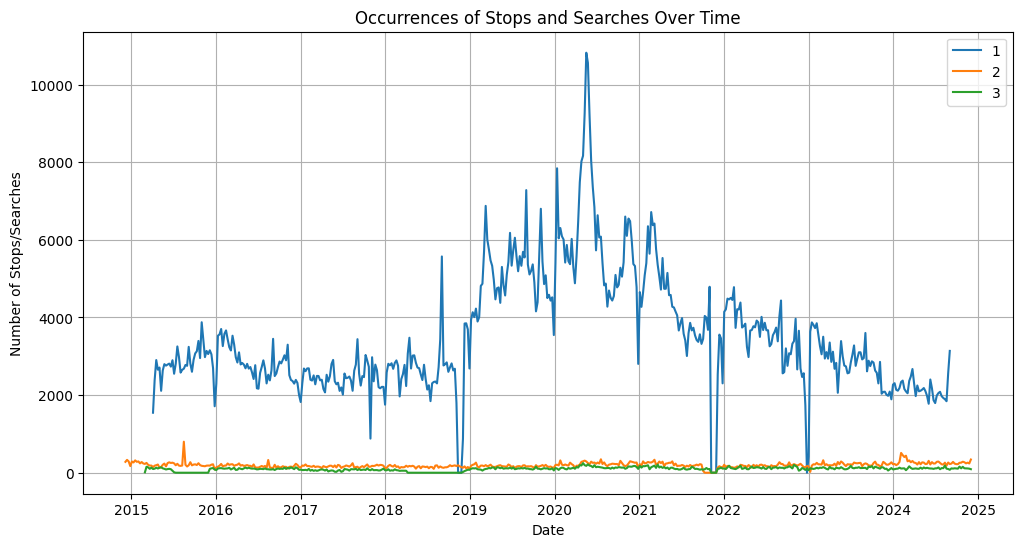

In [145]:
# df_1 = df[df['Legislation'] == 'Misuse of Drugs Act 1971 (section 23)']
# df_2 = df[df['Legislation'] == 'Police and Criminal Evidence Act 1984 (section 1)']
# df_3= df[df['Legislation'] == 'Criminal Justice and Public Order Act 1994 (section 60)']



# adjust 'D' to 'W' for weekly or 'M' for monthly
daily_counts_1 = df_1.resample('W').size()
daily_counts_2 = df_2.resample('W').size()
daily_counts_3 = df_3.resample('W').size()

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(df[df['Police_Dept'] == 'metropolitan'].resample('W').size(), label="1")
plt.plot(daily_counts_2, label="2")
plt.plot(daily_counts_3, label="3")


plt.title("Occurrences of Stops and Searches Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Stops/Searches")
plt.legend()
plt.grid(True)

plt.show()